In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

data is time series

w using statsmodels like ARMA, ARIMA and SARIMA


ARIMA - Auto Regression Integrated Moving Average

we want our data as stationary data


# Stationary data means it isn't changing over time

## A p-value below a threshold (such as 5% or 1%) suggests we reject the null hypothesis (stationary), otherwise a p-value above the threshold suggests we fail to reject the null hypothesis (non-stationary)

## p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
## p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

    Auto Regression => P =>  1st order(p)  2nd order(p)    p=>confirms how many lagg series are we goin to use 

                               one data     lagg
                          
                        yesterday's data
                          
Moving Average => q =>  first order MA = u + wt + {Q1wt - 1}

                        second order MA= u + wt + {Q1wt - 1 + Q2wt - 2}
                        
Integrated => d => differencing part =>  how much difference in our order is going to make data stationary                   

 



SARIMA - Seasonal Auto Regression Integrated Moving Average (summer/autumn/winter/fall)



In [2]:
data = pd.read_csv(r"C:\Users\apollo\Downloads\portland.csv")
data

,Month,"Portland Oregon average monthly bus ridership (/100) January 1973 through June 1982, n=114"
0,1960-01,648
1,1960-02,646
2,1960-03,639
3,1960-04,654
4,1960-05,630
...,...,...
110,1969-03,1419
111,1969-04,1432
112,1969-05,1394
113,1969-06,1327


In [3]:
data.columns=["Months","Av. monthly bus rides/100"]

In [4]:
data.shape

(115, 2)

In [5]:
data.isnull().sum()

Months                       0
Av. monthly bus rides/100    0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 2 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Months                     115 non-null    object
 1   Av. monthly bus rides/100  115 non-null    object
dtypes: object(2)
memory usage: 1.9+ KB


In [7]:
data.describe()

,Months,Av. monthly bus rides/100
count,115,115
unique,115,112
top,1960-11,1152
freq,1,2


In [8]:
data["Months"] = pd.to_datetime(data["Months"], errors="coerce", format="%Y-%m")

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 2 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Months                     114 non-null    datetime64[ns]
 1   Av. monthly bus rides/100  115 non-null    object        
dtypes: datetime64[ns](1), object(1)
memory usage: 1.9+ KB


In [10]:
 data

,Months,Av. monthly bus rides/100
0,1960-01-01,648
1,1960-02-01,646
2,1960-03-01,639
3,1960-04-01,654
4,1960-05-01,630
...,...,...
110,1969-03-01,1419
111,1969-04-01,1432
112,1969-05-01,1394
113,1969-06-01,1327


In [11]:
data.dropna(subset= ["Months"], inplace=True)
data

,Months,Av. monthly bus rides/100
0,1960-01-01,648
1,1960-02-01,646
2,1960-03-01,639
3,1960-04-01,654
4,1960-05-01,630
...,...,...
109,1969-02-01,1425
110,1969-03-01,1419
111,1969-04-01,1432
112,1969-05-01,1394


In [12]:
#for a time series data index is date and time



data.set_index("Months", inplace =True)




#

In [13]:
data

,Av. monthly bus rides/100
Months,
1960-01-01,648
1960-02-01,646
1960-03-01,639
1960-04-01,654
1960-05-01,630
...,...
1969-02-01,1425
1969-03-01,1419
1969-04-01,1432


In [14]:
data.dtypes

Av. monthly bus rides/100    object
dtype: object

In [15]:
data["Av. monthly bus rides/100"] = data["Av. monthly bus rides/100"].astype(int)

In [16]:
data.dtypes

Av. monthly bus rides/100    int32
dtype: object

<AxesSubplot:xlabel='Months'>

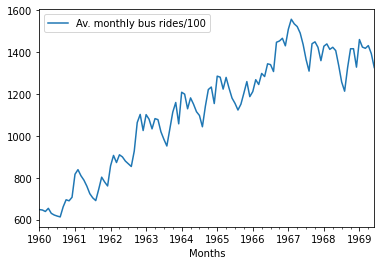

In [17]:
data.plot()

In [18]:
from statsmodels.tsa.stattools import adfuller

# p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.

# p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

In [19]:
x = data["Av. monthly bus rides/100"]
result = adfuller(x)

print("ADF statistics", result[0])
print("p-value",result[1])
print("criteria value",result[5])

if result[1]<=0.05:               # p-value
    print("Reject the null hypotheses h1, it means data is stationary")
else:
    print("fail to reject null hypotheses h1, it means data is not stationary")

ADF statistics -1.5365971444531605
p-value 0.5153358797821732
criteria value 1028.4238367341432
fail to reject null hypotheses h1, it means data is not stationary


In [20]:

data

,Av. monthly bus rides/100
Months,
1960-01-01,648
1960-02-01,646
1960-03-01,639
1960-04-01,654
1960-05-01,630
...,...
1969-02-01,1425
1969-03-01,1419
1969-04-01,1432


In [21]:
data["Av. monthly bus rides/100 FIRST DIFFERENCE"] = data["Av. monthly bus rides/100"] - data["Av. monthly bus rides/100"].shift(1)

In [22]:
data.head()

,Av. monthly bus rides/100,Av. monthly bus rides/100 FIRST DIFFERENCE
Months,,
1960-01-01,648,NaN
1960-02-01,646,-2.0
1960-03-01,639,-7.0
1960-04-01,654,15.0
1960-05-01,630,-24.0


In [23]:
x = data["Av. monthly bus rides/100 FIRST DIFFERENCE"].dropna()
result = adfuller(x)

print("ADF statistics", result[0])
print("p-value",result[1])
print("criteria value",result[5])

if result[1]<=0.05:               # p-value
    print("Reject the null hypotheses h1, it means data is stationary")
else:
    print("fail to reject null hypotheses h1, it means data is not stationary")

ADF statistics -1.9386960651548237
p-value 0.3140818370608597
criteria value 1019.5692927050793
fail to reject null hypotheses h1, it means data is not stationary


<AxesSubplot:xlabel='Months'>

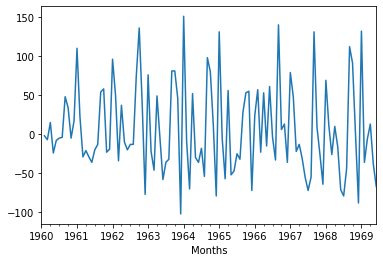

In [24]:
data["Av. monthly bus rides/100 FIRST DIFFERENCE"].plot()

In [25]:
data["Av. monthly bus rides/100 SECOND DIFFERENCE"] = data["Av. monthly bus rides/100"] - data["Av. monthly bus rides/100"].shift(12)

In [26]:
data.head()

,Av. monthly bus rides/100,Av. monthly bus rides/100 FIRST DIFFERENCE,Av. monthly bus rides/100 SECOND DIFFERENCE
Months,,,
1960-01-01,648,NaN,NaN
1960-02-01,646,-2.0,NaN
1960-03-01,639,-7.0,NaN
1960-04-01,654,15.0,NaN
1960-05-01,630,-24.0,NaN


In [27]:
x = data["Av. monthly bus rides/100 SECOND DIFFERENCE"].dropna()
result = adfuller(x)

print("ADF statistics", result[0])
print("p-value",result[1])
print("criteria value",result[5])

if result[1]<=0.05:               # p-value
    print("Reject the null hypotheses h1, it means data is stationary")
else:
    print("fail to reject null hypotheses h1, it means data is not stationary")

ADF statistics -2.469740563531969
p-value 0.12301141534048127
criteria value 901.5419314445508
fail to reject null hypotheses h1, it means data is not stationary


<AxesSubplot:xlabel='Months'>

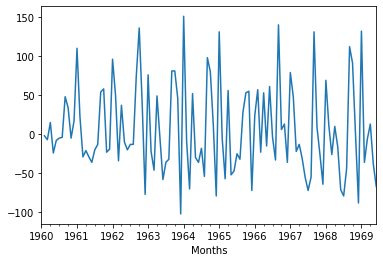

In [28]:
data["Av. monthly bus rides/100 FIRST DIFFERENCE"].plot()

In [32]:
data

,Av. monthly bus rides/100,Av. monthly bus rides/100 FIRST DIFFERENCE,Av. monthly bus rides/100 SECOND DIFFERENCE
Months,,,
1960-01-01,648,NaN,NaN
1960-02-01,646,-2.0,NaN
1960-03-01,639,-7.0,NaN
1960-04-01,654,15.0,NaN
1960-05-01,630,-24.0,NaN
...,...,...,...
1969-02-01,1425,-36.0,-15.0
1969-03-01,1419,-6.0,5.0
1969-04-01,1432,13.0,8.0


In [29]:
data.isnull().sum()

Av. monthly bus rides/100                       0
Av. monthly bus rides/100 FIRST DIFFERENCE      1
Av. monthly bus rides/100 SECOND DIFFERENCE    12
dtype: int64

In [30]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

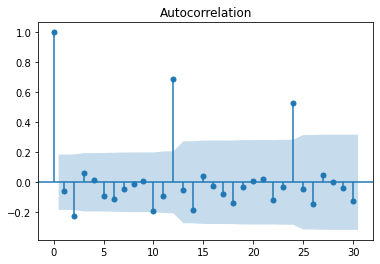

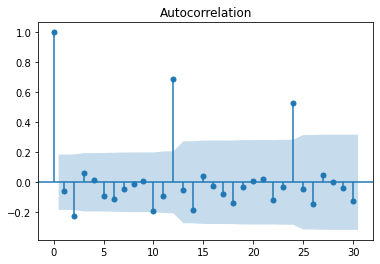

In [31]:
plot_acf(data["Av. monthly bus rides/100 FIRST DIFFERENCE"].iloc[1:], lags=30)

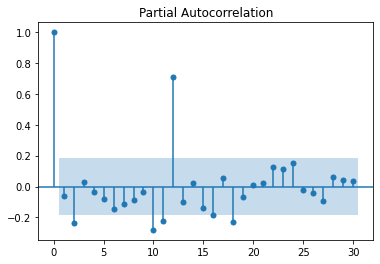

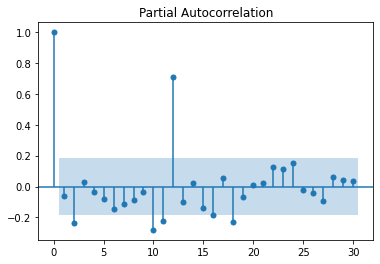

In [33]:
plot_pacf(data["Av. monthly bus rides/100 FIRST DIFFERENCE"].iloc[1:], lags=30)

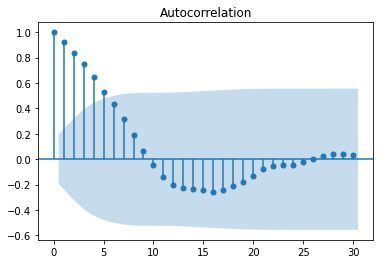

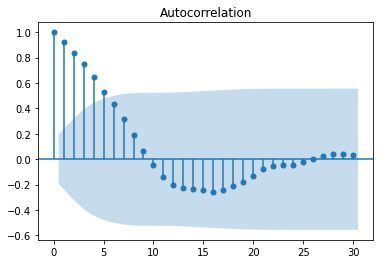

In [34]:
plot_acf(data["Av. monthly bus rides/100 SECOND DIFFERENCE"].iloc[12:], lags=30)

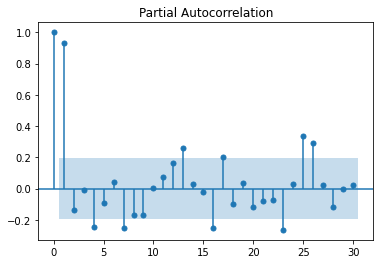

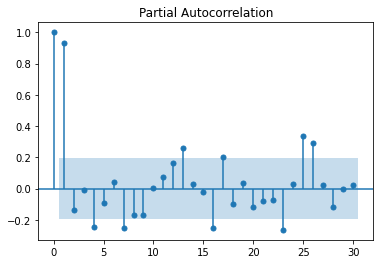

In [36]:
plot_pacf(data["Av. monthly bus rides/100 SECOND DIFFERENCE"].iloc[12:], lags=30)

   # Its ARMA MODEL

In [37]:
from statsmodels.tsa.arima_model import ARMA

In [39]:
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

In [40]:
model = ARMA(data["Av. monthly bus rides/100"], order = (2,2))  # order = (p,q)  lowest values from auto correleration graph
model_fit = model.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '


In [41]:
model_fit.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:1490: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))


<class 'statsmodels.iolib.summary.Summary'>
"""
                                  ARMA Model Results                                 
=====================================================================================
Dep. Variable:     Av. monthly bus rides/100   No. Observations:                  114
Model:                            ARMA(2, 2)   Log Likelihood                -625.116
Method:                              css-mle   S.D. of innovations             56.778
Date:                       Fri, 02 Jul 2021   AIC                           1262.233
Time:                               23:50:36   BIC                           1278.650
Sample:                           01-01-1960   HQIC                          1268.895
                                - 06-01-1969                                         
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                            1686.4047        nan        nan        nan         nan         nan
ar.L1.Av. monthly bus rides/100     1.9969      0.001   2536.291      0.000       1.995       1.998
ar.L2.Av. monthly bus rides/100    -0.9970      0.001  -1086.588      0.000      -0.999      -0.995
ma.L1.Av. monthly bus rides/100    -1.0715      0.115     -9.314      0.000      -1.297      -0.846
ma.L2.Av. monthly bus rides/100     0.0715      0.116      0.617      0.537      -0.156       0.299
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0015           -0.0082j            1.0015           -0.0013
AR.2            1.0015           +0.0082j            1.0015            0.0013
MA.1            1.0000           +0.0000j            1.0000            0.0000
MA.2           13.9810           +0.0000j           13.9810            0.0000
-----------------------------------------------------------------------------
"""

<AxesSubplot:xlabel='Months'>

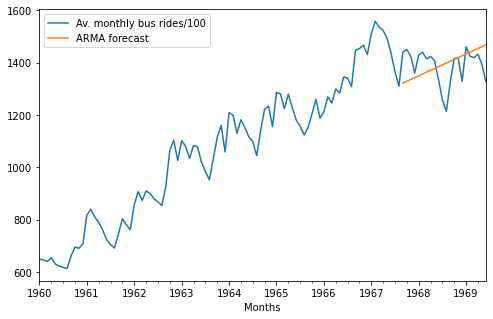

In [42]:
data["ARMA forecast"] = model_fit.predict(start=92, end=114, dynamic=True)   # 92 starting point of prediction & 114 endinng
data[["Av. monthly bus rides/100","ARMA forecast"]].plot(figsize=(8,5))

# Its ARIMA MODEL

In [43]:
from statsmodels.tsa.arima_model import ARIMA

In [46]:
model = ARIMA(data["Av. monthly bus rides/100"], order = (2,1,2))  # order = (p,d,q)  lowest values from auto correleration graph
model_fit = model.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [47]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  ARIMA Model Results                                  
=======================================================================================
Dep. Variable:     D.Av. monthly bus rides/100   No. Observations:                  113
Model:                          ARIMA(2, 1, 2)   Log Likelihood                -611.903
Method:                                css-mle   S.D. of innovations             54.314
Date:                         Fri, 02 Jul 2021   AIC                           1235.807
Time:                                 23:58:07   BIC                           1252.171
Sample:                             02-01-1960   HQIC                          1242.447
                                  - 06-01-1969                                         
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                 6.7323      2.247      2.996      0.003       2.328      11.137
ar.L1.D.Av. monthly bus rides/100     0.1449      0.274      0.530      0.596      -0.391       0.681
ar.L2.D.Av. monthly bus rides/100     0.2776      0.238      1.167      0.243      -0.188       0.744
ma.L1.D.Av. monthly bus rides/100    -0.2315      0.244     -0.949      0.343      -0.710       0.247
ma.L2.D.Av. monthly bus rides/100    -0.5258      0.223     -2.355      0.019      -0.963      -0.088
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.6548           +0.0000j            1.6548            0.0000
AR.2           -2.1768           +0.0000j            2.1768            0.5000
MA.1            1.1764           +0.0000j            1.1764            0.0000
MA.2           -1.6167           +0.0000j            1.6167            0.5000
-----------------------------------------------------------------------------
"""

<AxesSubplot:xlabel='Months'>

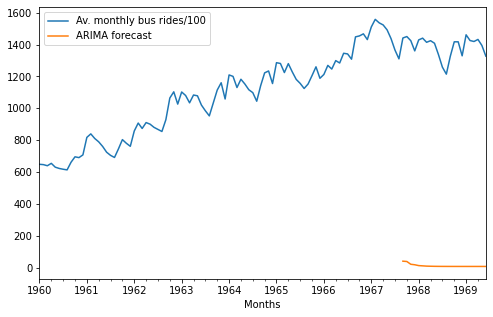

In [48]:
data["ARIMA forecast"] = model_fit.predict(start=92, end=114, dynamic=True)   # 92 starting point of prediction & 114 endinng
data[["Av. monthly bus rides/100","ARIMA forecast"]].plot(figsize=(8,5))

# its SARIMA


In [51]:
import statsmodels.api as sm

In [52]:
model = sm.tsa.statespace.SARIMAX(data["Av. monthly bus rides/100"], order=(2,1,2), seasonal_order=(2,1,2,6))  # p,d,q,seasonal_factor
result = model.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


<AxesSubplot:xlabel='Months'>

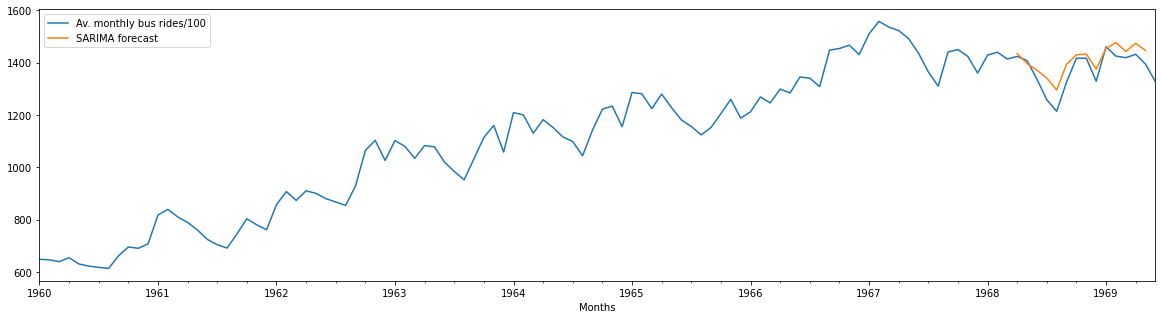

In [53]:
data["SARIMA forecast"] = result.predict(start=99, end=112, dynamic=True)   # 99 starting point of prediction & 112 endinng
data[["Av. monthly bus rides/100","SARIMA forecast"]].plot(figsize=(20,5))

# Future prediction using SARIMA model

In [57]:
import datetime
from dateutil.relativedelta import relativedelta


start = datetime.datetime.strptime("1969-07-01", "%Y-%m-%d")

date_list = [start + relativedelta(months=x) for x in range(0,12)]    # creating the data for 12 months for future predicion

future_prediction = pd.DataFrame(index=date_list, columns = data.columns)
data = pd.concat([data, future_prediction])

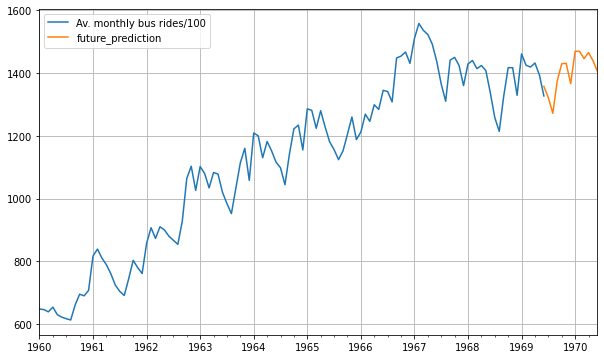

In [58]:
data["future_prediction"] = result.predict(start=113, end=130, dynamic=True)   # 99 starting point of prediction & 112 endinng
data[["Av. monthly bus rides/100","future_prediction"]].plot(figsize=(10,6))
plt.grid(True)